In [1]:

import json
import csv
import threading
import math
import pandas as pd
import numpy as np
import multiprocessing
import random as rn

import seaborn as sns
import matplotlib.pyplot as plt



# from data import data_visualization, data_loading, data_preprocessing
# from models import annModels

# from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import  learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier

# import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Activation
from keras.optimizers import SGD
from keras.models import load_model
from keras import regularizers
from keras import backend as K
from keras.layers import BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.layers import concatenate
from sklearn.model_selection import StratifiedKFold

import joblib

2024-08-24 16:27:07.326119: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-24 16:27:07.341436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 16:27:07.357813: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 16:27:07.362191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 16:27:07.375332: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
9422/9422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8265 - loss: 0.3726
Epoch 1: val_loss improved from inf to 0.23680, saving model to /home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/cnn_1d_final_binary_base_classifier.keras
9422/9422 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8265 - loss: 0.3725 - val_accuracy: 0.8990 - val_loss: 0.2368
Epoch 2/50
9388/9422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8980 - loss: 0.2420
Epoch 2: val_loss improved from 0.23680 to 0.20292, saving model to /home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/cnn_1d_final_binary_base_classifier.keras
9422/9422 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8980 - loss: 0.2420 - val_accuracy: 0.9167 - val_loss: 0.2029
Epoch 3/50
9398/9422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9078 - loss: 0.2196
Epoch 3: val_loss improved from 0.20292 to 0.18985, saving model to /home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/cnn_1d_final_binary_base_classifier.keras
9422/

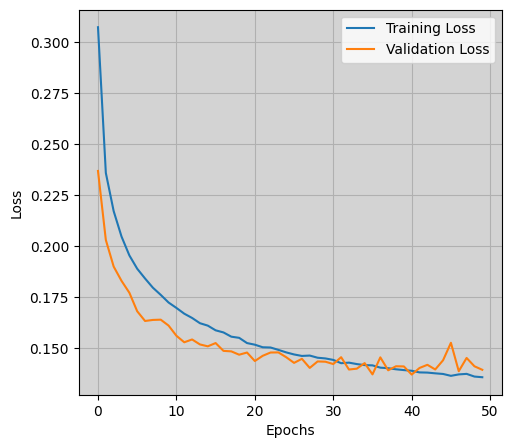

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
def load_data():
    df = pd.read_csv('/home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/final_dataset.csv')
    X = df.drop(['label', 'Unnamed: 0'], axis=True).values
    y = df['label'].values
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train,
        y_train,
        test_size=0.1,
        random_state=42,
        stratify=y_train
    )

    return X_train, X_test, y_train, y_test, X_val, y_val

X_train, X_test, y_train, y_test, X_val, y_val = load_data()

# Reshape data for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build and compile the 1D CNN model
def build_1d_cnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Adjust dropout rate
    model.add(Dense(2, activation='softmax'))  # 2 units for binary classification
    
    # Compile model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

input_shape = (X_train.shape[1], 1)
model_1d_cnn = build_1d_cnn(input_shape)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath='/home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/cnn_1d_final_binary_base_classifier.keras', 
    monitor='val_loss', 
    save_best_only=True,
    save_weights_only=False, 
    mode='min', 
    verbose=1
)

# Train the model
history_1d_cnn = model_1d_cnn.fit(X_train, y_train,
                                  epochs=50,
                                  batch_size=32,
                                  validation_data=(X_val, y_val),
                                  callbacks=[early_stopping, model_checkpoint])

# Make predictions on the test set
y_pred_prob = model_1d_cnn.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert y_test back to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred)
recall = recall_score(y_test_labels, y_pred)
f1 = f1_score(y_test_labels, y_pred)

# Print results
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_1d_cnn.history['loss'], label='Training Loss')
plt.plot(history_1d_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('lightgrey')

# Display the plot
plt.show()


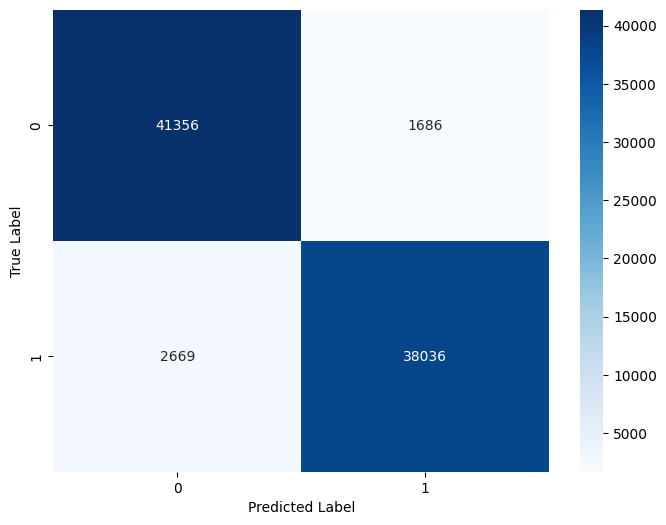

In [12]:
# Optional: Visualize the confusion matrix
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.title('Confusion Matrix')

plt.show()


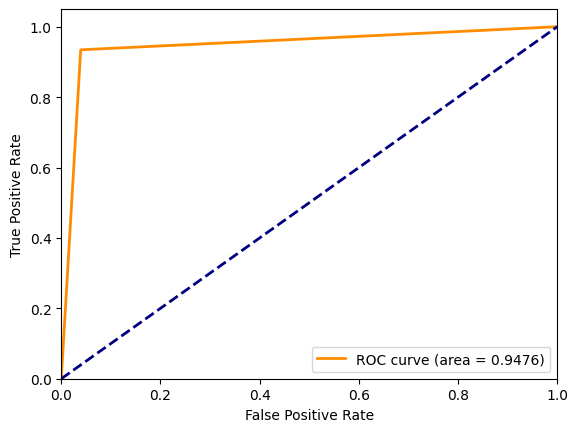

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, accuracy_score
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_labels, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [11]:
# Save the trained model
model_1d_cnn.save('/home/devnath/Ember_18_Aug/model_save/1dcnn_base_classfier.h5')

In [2]:
from tensorflow.keras.models import load_model
# Load the model from the .h5 file
model = load_model('/home/devnath/Ember_18_Aug/model_save/1dcnn_base_classfier.h5')

2024-08-25 15:30:55.309606: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 15:30:55.325264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 15:30:55.344035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 15:30:55.348588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-25 15:30:55.360448: I tensorflow/core/platform/cpu_feature_guar

In [3]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 39, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 17, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,260 (282.27 KB)

 Trainable params: 72,258 (282.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)